# Polynomial Regression

* In this assignment, we perform Polynomial Regression, using 
polynomials of degrees 0 to 9 without regularization.
* The general polynomial of order M has polynomial coefficients which are collectively denoted by the vector w. 
* The values of the coefficients will be determined by fitting the polynomial to the training data. 
* This can be done by minimizing an error function that measures the misfit between the function y(x,w), for any given value of w, and the training set data points.  
* We use the Mean Square Error function in this assignment

### Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle

import tqdm
from tqdm import notebook

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


### Loading Data

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/FODSAssignment/FoDS-A1.csv')
df

,Strength,Temperature,Pressure
0,30.7,240,16
1,24.7,250,18
2,30.6,260,16
3,32.8,240,10
4,20.7,240,20
...,...,...,...
1645,32.5,270,20
1646,38.6,290,14
1647,39.7,290,12
1648,14.6,200,20


### Data Preprocessing

Before implementing the algorithms, we pre-process the data which includes,
* Shuffling the data, 
* Standardizing the values, and 
* creating a random 70-30 split to aid in training and testing respectively.


In [ ]:
df = df.sample(frac=1).reset_index(drop=True)
df

,Strength,Temperature,Pressure
0,13.7,200,20
1,46.5,300,12
2,32.7,240,14
3,25.8,210,14
4,33.0,230,10
...,...,...,...
1645,22.2,200,12
1646,17.7,200,16
1647,28.4,260,16
1648,42.2,290,10


In [ ]:
X_original = df.values[:,:-1]
y_original = df.values[:,-1]

In [ ]:
df.describe()

,Strength,Temperature,Pressure
count,1650.000000,1650.000000,1650.000000
mean,30.000000,250.000000,15.000000
std,7.390248,31.632364,3.416686
min,12.400000,200.000000,10.000000
25%,24.400000,220.000000,12.000000
50%,30.200000,250.000000,15.000000
75%,35.700000,280.000000,18.000000
max,48.700000,300.000000,20.000000


In [ ]:
mu_df = np.mean(df,axis=0)
std_df = np.std(df,axis=0)

In [ ]:
# standardize the dataset
df = (df-mu_df)/std_df
df

,Strength,Temperature,Pressure
0,-2.206278,-1.581139,1.46385
1,2.233349,1.581139,-0.87831
2,0.365457,-0.316228,-0.29277
3,-0.568489,-1.264911,-0.29277
4,0.406063,-0.632456,-1.46385
...,...,...,...
1645,-1.055765,-1.581139,-0.87831
1646,-1.664860,-1.581139,0.29277
1647,-0.216567,0.316228,0.29277
1648,1.651325,1.264911,-1.46385


In [ ]:
# Train-Test Split
# split the data set into 70:30 train:test 

split_index = int(0.7*len(df))

data = df.values
X = data[:,:-1]
y = data[:,-1]

train_X = X[:split_index]
train_y = y[:split_index]

test_X = X[split_index:]
test_y = y[split_index:]

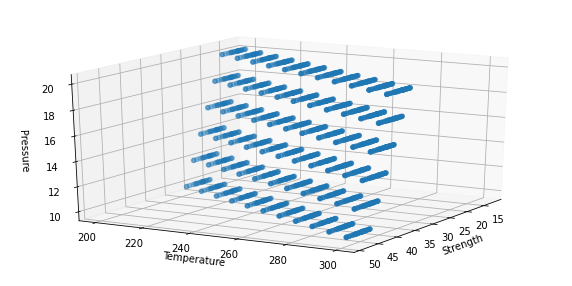

In [ ]:
# Plot of Original Dataset
plt.figure(figsize=(10, 5))
ax = plt.axes(projection='3d')
ax.scatter3D(X_original[:,0], X_original[:,1], y_original)
ax.set_xlabel("Strength")
ax.set_ylabel("Temperature")
ax.set_zlabel("Pressure")
ax.view_init(20,30)

plt.show()

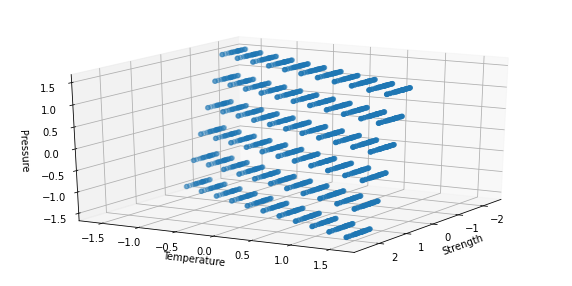

In [ ]:
# Plot of Standardized datset
plt.figure(figsize=(10, 5))
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:,1], y)
ax.set_xlabel("Strength")
ax.set_ylabel("Temperature")
ax.set_zlabel("Pressure")
ax.view_init(20,30)

plt.show()

In [ ]:
# function to generate polynomial curve                     
def genCurve(weight,xx,yy,degree):
  #X_trans = np.ones((len(X[:,1]), 1), dtype=int)
  Z=weight[0]
  count=0
  for i in range(degree+1):
    for j in range(degree+1-i):
      if i!=0 or j!=0:
        count=count+1
        Z+=weight[count]*(xx**i)*(yy**j)
  return Z    

### Model

In [ ]:
class PolynomialRegression():

    def __init__(self, degree):
        self.w = None
        self.degree = degree

    def transform(self,X):
        '''
        Transforms the features to degree d polynomial features
        '''
        X_trans = np.ones((len(X[:,1]), 1), dtype=int) 
        for i in range(self.degree+1):
            for j in range(self.degree+1-i):
                if i!=0 or j!=0:
                    t = np.array([np.multiply(np.power(X[:,0],i),np.power(X[:,-1],j))])
                    X_trans = np.concatenate((X_trans, t.T), axis=1)
        return X_trans

    def polynomial(self, X):   
      '''
      Evaluates the polynomial by doing a dot product of the weights with the feature variables.
      ''' 
        return np.dot(X, self.w.T) 
    
    def mean_squared_error(self, y_pred, y):
        '''
        Evaluates the Mean Squared error of the predicted values by comparing it with the true values.
        Parameters:
            y_pred: Predicted values.
            y: True output values.
        '''
        return np.sum((y-y_pred)**2)/y.shape[0]

    def grad_w(self, x, y):    
        '''
        Calculates the gradient of the weight values.
        Parameters:
            x: Training point
            y:  
        '''
        y_pred = self.polynomial(x)  
        m = X.shape[0]
        
        return (1/m)*x.T.dot(y_pred - y)
        

    def predict(self, X):
        '''
        Evaluates the polynomial function value of the given data.
        Parameters:
            X: testing sample
        '''
        return self.polynomial(X)

    def evaluate(self, x_test, y_test):
        '''
        Evaluates the model for a given testing data
        Parameters:
            x_test: testing samples
            y_test: testing labels
        '''
        y_pred = self.predict(x_test)
        test_loss = self.mean_squared_error(y_pred, y_test)
        print("Testing MSE is ", test_loss)
        mae = (1/y_test.shape[0])*np.sum(np.absolute(y_pred-y_test))
        print("Testing MAE is ", mae)

    def fit(self, X,Y, epochs = 1, learning='GD', learning_rate = 1, display_loss=True, printValues=True):
      '''
        Performs Gradient descent or Stochastic Gradient descent as mentioned.
        Paremeters-
          X - training features
          Y - training target attributes
          epochs - number of iterations the gradient descent should run
          learning - learning rate for gradient update
          display_loss, printValues -  printing loss in each epoch

      '''

        count=0
        m = X.shape[0]

        self.w = np.random.randn(X.shape[1],)

        if display_loss:
            loss={}
            accuracy={}
        
        print("Training...")

        for i in tqdm.notebook.tqdm(range(epochs), total=epochs, unit="epoch"):
            
            dw = 0
            if learning == 'GD':

                y_estimated = self.predict(X)
                
                dw = self.grad_w(X, Y)
                self.w = self.w - (learning_rate * dw) 
                
                error = y_estimated - Y
                cost = (1 / 2 * m) * np.sum(error ** 2)             

            if learning == 'SGD':
                randInt = np.random.randint(0,X.shape[0])
                x = X[randInt, :]
                y = Y[randInt]
                Y_pred = self.predict(X)
                dw = x*(Y_pred[randInt] - y) 
                error = Y_pred - Y

                self.w -= learning_rate * dw

            if display_loss:
                Y_pred = self.polynomial(X)   
                loss[i] = self.mean_squared_error(Y_pred,Y)
                if i%50==0:
                    print('Epoch:', i,  ' MSE Loss :', loss[i])

        if display_loss and count%50==0:
            plt.subplot(2, 1, 1)
            plt.plot(list(loss.values()))
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            
            plt.show()
        count=count+1

        print("Testing")


### 0 Degree Polynomial

##### Gradient Descent

Training...


  0%|          | 0/500 [00:00<?, ?epoch/s]

Epoch: 0  Cost :  2578407.0670544864  MSE Loss : 3.82529485606643
Epoch: 50  Cost :  1605829.5275586953  MSE Loss : 2.3875270327613407
Epoch: 100  Cost :  1124049.1746892517  MSE Loss : 1.6753079436639677
Epoch: 150  Cost :  885392.3077711262  MSE Loss : 1.3224999153770147
Epoch: 200  Cost :  767170.1764867256  MSE Loss : 1.1477313550713957
Epoch: 250  Cost :  708607.1336297992  MSE Loss : 1.0611572206345907
Epoch: 300  Cost :  679597.083215366  MSE Loss : 1.018271470815657
Epoch: 350  Cost :  665226.5351018739  MSE Loss : 0.9970273942852159
Epoch: 400  Cost :  658107.8762187633  MSE Loss : 0.9865038336727353
Epoch: 450  Cost :  654581.5455670805  MSE Loss : 0.9812908356962939


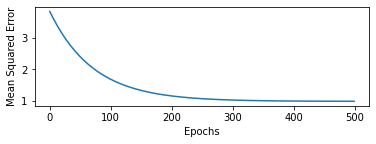

Testing
Testing MSE is  1.0614268606304513
Testing MAE is  0.912535309411559


In [ ]:
GD0 = PolynomialRegression(0)
x_train_trans_0 = GD0.transform(train_X)
GD0.fit(x_train_trans_0, train_y, epochs = 500, learning='GD', learning_rate=0.01)
x_test_trans_0 = GD0.transform(test_X)
GD0.evaluate(x_test_trans_0 , test_y)

In [ ]:
wGD0 = GD0.w

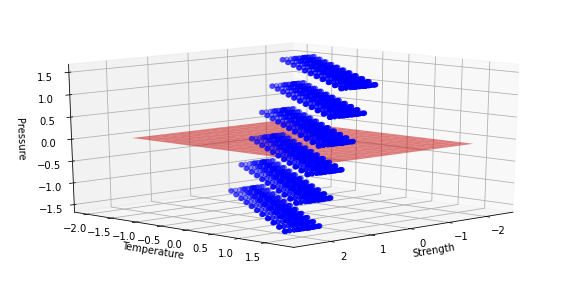

In [ ]:
# plot for 0 degree polynomial GD

plt.figure(figsize=(10, 5))
ax = plt.axes(projection='3d')

xx,yy = np.meshgrid(np.arange(-2, 2, 0.25), np.arange(-2, 2, 0.25))
Z = (np.array([wGD0]) * 1)

ax.plot_surface(xx, yy, Z, alpha=0.5, color='r')
ax.scatter3D(X[:,0], X[:,1], y, c='b' )
ax.set_xlabel("Strength")
ax.set_ylabel("Temperature")
ax.set_zlabel("Pressure")
ax.view_init(15,45)

plt.show()

##### Stochastic Gradient Descent

Training...


  0%|          | 0/500 [00:00<?, ?epoch/s]

Epoch: 0  MSE Loss : 1.7323667915529526
Epoch: 50  MSE Loss : 1.2752233059121134
Epoch: 100  MSE Loss : 1.057037233659229
Epoch: 150  MSE Loss : 1.0595593007181512
Epoch: 200  MSE Loss : 0.9975932459477024
Epoch: 250  MSE Loss : 0.9774469797970498
Epoch: 300  MSE Loss : 0.9791912488966862
Epoch: 350  MSE Loss : 0.9762466490081706
Epoch: 400  MSE Loss : 0.9826720104277772
Epoch: 450  MSE Loss : 0.9761858029813477


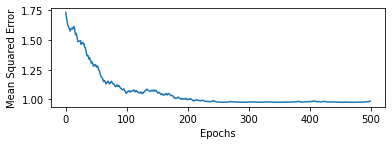

Testing
Testing MSE is  1.0720366904942185
Testing MAE is  0.9144666100924104


In [ ]:
SGD0 = PolynomialRegression(0)
x_train_trans_0 = SGD0.transform(train_X)
SGD0.fit(x_train_trans_0, train_y, epochs = 500, learning='SGD', learning_rate=0.01)
x_test_trans_0 = SGD0.transform(test_X)
SGD0.evaluate(x_test_trans_0 , test_y)

In [ ]:
wSGD0 = SGD0.w

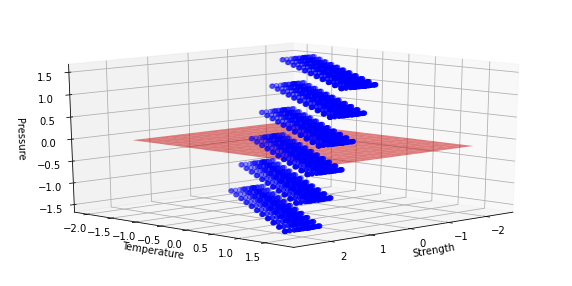

In [ ]:
# plot for 0 degree polynomial GD

plt.figure(figsize=(10, 5))
ax = plt.axes(projection='3d')

xx,yy = np.meshgrid(np.arange(-2, 2, 0.25), np.arange(-2, 2, 0.25))
Z = (np.array([wSGD0]) * 1)

ax.plot_surface(xx, yy, Z, alpha=0.5, color='r')
ax.scatter3D(X[:,0], X[:,1], y, c='b' )
ax.set_xlabel("Strength")
ax.set_ylabel("Temperature")
ax.set_zlabel("Pressure")
ax.view_init(15,45)

plt.show()

### 1 Degree Polynomial

##### GD

Training...


  0%|          | 0/2000 [00:00<?, ?epoch/s]

Epoch: 0  Cost :  2288038.5810981803  MSE Loss : 3.360773002917144
Epoch: 50  Cost :  1151139.6121786607  MSE Loss : 1.7108804844555383
Epoch: 100  Cost :  822299.5095287056  MSE Loss : 1.226057874120772
Epoch: 150  Cost :  639082.6731087483  MSE Loss : 0.9536193102201087
Epoch: 200  Cost :  509925.6903720678  MSE Loss : 0.7611943628607561
Epoch: 250  Cost :  414521.7658977164  MSE Loss : 0.6190091762390408
Epoch: 300  Cost :  343495.585885597  MSE Loss : 0.5131495954729105
Epoch: 350  Cost :  290550.73864267324  MSE Loss : 0.43423828997486147
Epoch: 400  Cost :  251076.08589170163  MSE Loss : 0.3754034653241992
Epoch: 450  Cost :  221643.57121441732  MSE Loss : 0.3315358916737784
Epoch: 500  Cost :  199698.41127670367  MSE Loss : 0.2988278147048415
Epoch: 550  Cost :  183335.8793236957  MSE Loss : 0.2744403434245491
Epoch: 600  Cost :  171135.80923458943  MSE Loss : 0.2562567970114976
Epoch: 650  Cost :  162039.31280192645  MSE Loss : 0.24269895972883052
Epoch: 700  Cost :  155256.872

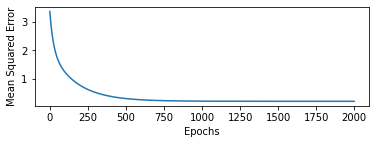

Testing
Testing MSE is  0.19327247984737836
Testing MAE is  0.35131608596163466


In [ ]:
GD1 = PolynomialRegression(1)
x_train_trans_1 = GD1.transform(train_X)
GD1.fit(x_train_trans_1, train_y, epochs = 2000, learning='GD', learning_rate=0.03)
x_test_trans_1 = GD1.transform(test_X)
GD1.evaluate(x_test_trans_1 , test_y)

In [ ]:
wGD1 = GD1.w

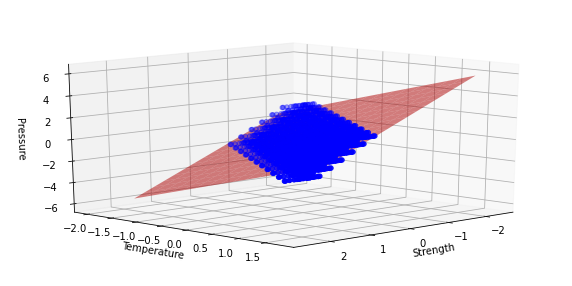

In [ ]:
# plot for 0 degree polynomial GD

plt.figure(figsize=(10, 5))
ax = plt.axes(projection='3d')

xx,yy = np.meshgrid(np.arange(-2, 2, 0.25), np.arange(-2, 2, 0.25))
Z=genCurve(wGD1,xx,yy,1)

ax.plot_surface(xx, yy, Z, alpha=0.5, color='r')
ax.scatter3D(X[:,0], X[:,1], y, c='b' )
ax.set_xlabel("Strength")
ax.set_ylabel("Temperature")
ax.set_zlabel("Pressure")
ax.view_init(15,45)

plt.show()

##### Stochastic Gradient Descent

Training...


  0%|          | 0/2000 [00:00<?, ?epoch/s]

Epoch: 0  MSE Loss : 1.0821551818342043
Epoch: 50  MSE Loss : 0.8322925493694056
Epoch: 100  MSE Loss : 0.6010430069017816
Epoch: 150  MSE Loss : 0.46910772074673174
Epoch: 200  MSE Loss : 0.3904518040580708
Epoch: 250  MSE Loss : 0.33834724935987076
Epoch: 300  MSE Loss : 0.3076051765703738
Epoch: 350  MSE Loss : 0.295840896852039
Epoch: 400  MSE Loss : 0.27828960912799033
Epoch: 450  MSE Loss : 0.2684739866480602
Epoch: 500  MSE Loss : 0.2636480274865658
Epoch: 550  MSE Loss : 0.2532681592470589
Epoch: 600  MSE Loss : 0.2487061268376084
Epoch: 650  MSE Loss : 0.24209609965565584
Epoch: 700  MSE Loss : 0.23823450771120275
Epoch: 750  MSE Loss : 0.23652628287834482
Epoch: 800  MSE Loss : 0.2321216439606909
Epoch: 850  MSE Loss : 0.23019906553202849
Epoch: 900  MSE Loss : 0.22860177961617786
Epoch: 950  MSE Loss : 0.2264769102658715
Epoch: 1000  MSE Loss : 0.22551126490954765
Epoch: 1050  MSE Loss : 0.2252415967734593
Epoch: 1100  MSE Loss : 0.22545023921993365
Epoch: 1150  MSE Loss : 0

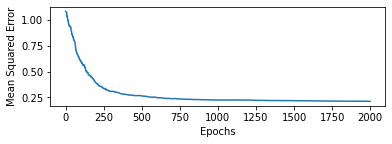

Testing
Testing MSE is  0.20760871673426864
Testing MAE is  0.37099574709391864


In [ ]:
SGD1 = PolynomialRegression(1)
x_train_trans_1 = SGD1.transform(train_X)
SGD1.fit(x_train_trans_1, train_y, epochs = 2000, learning='SGD', learning_rate=0.003)
x_test_trans_1 = SGD1.transform(test_X)
SGD1.evaluate(x_test_trans_1 , test_y)

In [ ]:
wSGD1 = SGD1.w

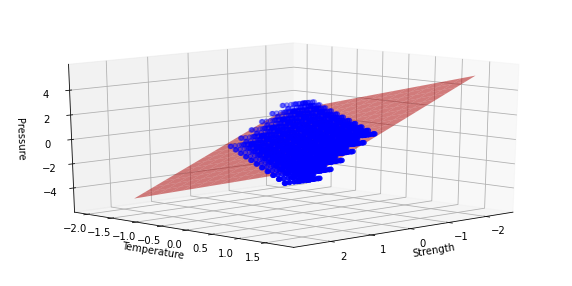

In [ ]:
# plot for 1 degree polynomial SGD

plt.figure(figsize=(10, 5))
ax = plt.axes(projection='3d')

xx,yy = np.meshgrid(np.arange(-2, 2, 0.25), np.arange(-2, 2, 0.25))
Z=genCurve(wSGD1,xx,yy,1)

ax.plot_surface(xx, yy, Z, alpha=0.5, color='r')
ax.scatter3D(X[:,0], X[:,1], y, c='b' )
ax.set_xlabel("Strength")
ax.set_ylabel("Temperature")
ax.set_zlabel("Pressure")
ax.view_init(15,45)

plt.show()

### 2 Degree Polynomial

##### GD

Training...


  0%|          | 0/2000 [00:00<?, ?epoch/s]

Epoch: 0  Cost :  2467471.519698229  MSE Loss : 3.372931579052227
Epoch: 50  Cost :  674031.7516013959  MSE Loss : 1.0027952345057034
Epoch: 100  Cost :  497885.92177911365  MSE Loss : 0.742753706638717
Epoch: 150  Cost :  400504.844502084  MSE Loss : 0.5981508478303331
Epoch: 200  Cost :  337079.93275009346  MSE Loss : 0.5037960760285621
Epoch: 250  Cost :  292723.7995829491  MSE Loss : 0.43773398677547515
Epoch: 300  Cost :  260147.9295350853  MSE Loss : 0.38917662185694546
Epoch: 350  Cost :  235361.41336269974  MSE Loss : 0.35220819566007805
Epoch: 400  Cost :  216028.99601328862  MSE Loss : 0.3233627192817627
Epoch: 450  Cost :  200694.63424945404  MSE Loss : 0.30047640359283473
Epoch: 500  Cost :  188393.24297174226  MSE Loss : 0.28211338883239917
Epoch: 550  Cost :  178449.6622195616  MSE Loss : 0.2672681813686691
Epoch: 600  Cost :  170370.39904755325  MSE Loss : 0.2552052746606998
Epoch: 650  Cost :  163782.52496208693  MSE Loss : 0.24536853711389278
Epoch: 700  Cost :  158397

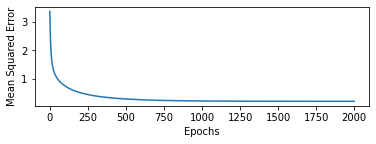

Testing
Testing MSE is  0.19367616934104903
Testing MAE is  0.351446626586529


In [ ]:
GD2 = PolynomialRegression(2)
x_train_trans_2 = GD2.transform(train_X)
GD2.fit(x_train_trans_2, train_y, epochs = 2000, learning='GD', learning_rate=0.02)
x_test_trans_2 = GD2.transform(test_X)
GD2.evaluate(x_test_trans_2 , test_y)

In [ ]:
wGD2 = GD2.w

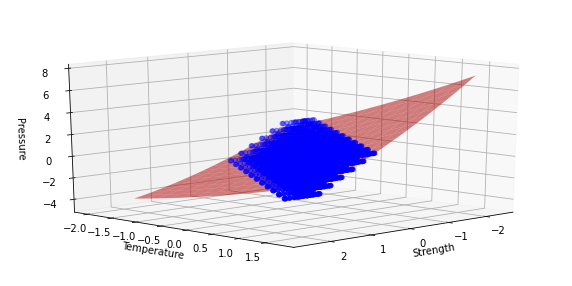

In [ ]:
# plot for 0 degree polynomial GD

plt.figure(figsize=(10, 5))
ax = plt.axes(projection='3d')

xx,yy = np.meshgrid(np.arange(-2, 2, 0.25), np.arange(-2, 2, 0.25))
Z=genCurve(wGD2,xx,yy,2)

ax.plot_surface(xx, yy, Z, alpha=0.5, color='r')
ax.scatter3D(X[:,0], X[:,1], y, c='b' )
ax.set_xlabel("Strength")
ax.set_ylabel("Temperature")
ax.set_zlabel("Pressure")
ax.view_init(15,45)

plt.show()

##### Stochastic Gradient Descent

Training...


  0%|          | 0/2500 [00:00<?, ?epoch/s]

Epoch: 0  MSE Loss : 2.9327737366135196
Epoch: 50  MSE Loss : 1.9483645067659874
Epoch: 100  MSE Loss : 2.1661061091314604
Epoch: 150  MSE Loss : 0.8808093369247105
Epoch: 200  MSE Loss : 0.7666357088102479
Epoch: 250  MSE Loss : 0.6102669330001026
Epoch: 300  MSE Loss : 0.5294342037377817
Epoch: 350  MSE Loss : 0.4601808041123964
Epoch: 400  MSE Loss : 0.4402190833228442
Epoch: 450  MSE Loss : 0.4184849922173948
Epoch: 500  MSE Loss : 0.3340390649870115
Epoch: 550  MSE Loss : 0.30010079141109053
Epoch: 600  MSE Loss : 0.2753935819336081
Epoch: 650  MSE Loss : 0.25894616431930406
Epoch: 700  MSE Loss : 0.28923625039668777
Epoch: 750  MSE Loss : 0.24336365146174413
Epoch: 800  MSE Loss : 0.28250778991021314
Epoch: 850  MSE Loss : 0.25176532948648556
Epoch: 900  MSE Loss : 0.2647001476643619
Epoch: 950  MSE Loss : 0.2388973177685234
Epoch: 1000  MSE Loss : 0.23222143737330359
Epoch: 1050  MSE Loss : 0.22508108876223507
Epoch: 1100  MSE Loss : 0.24507448227351716
Epoch: 1150  MSE Loss : 0

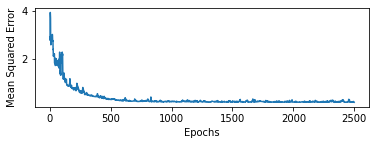

Testing
Testing MSE is  0.20440414494786002
Testing MAE is  0.3554959176431858


In [ ]:
SGD2 = PolynomialRegression(2)
x_train_trans_2 = SGD2.transform(train_X)
SGD2.fit(x_train_trans_2, train_y, epochs = 2500, learning='SGD', learning_rate=0.02)
x_test_trans_2 = SGD2.transform(test_X)
SGD2.evaluate(x_test_trans_2 , test_y)

In [ ]:
wSGD2 = SGD2.w

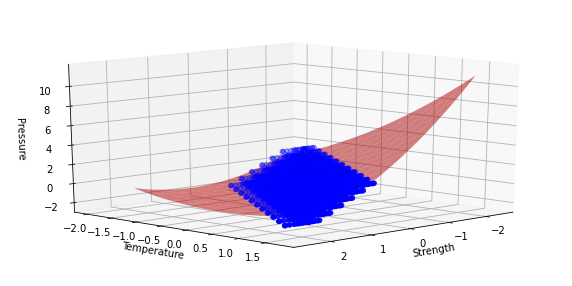

In [ ]:
# plot for 1 degree polynomial SGD

plt.figure(figsize=(10, 5))
ax = plt.axes(projection='3d')

xx,yy = np.meshgrid(np.arange(-2, 2, 0.25), np.arange(-2, 2, 0.25))
Z=genCurve(wSGD2,xx,yy,2)

ax.plot_surface(xx, yy, Z, alpha=0.5, color='r')
ax.scatter3D(X[:,0], X[:,1], y, c='b' )
ax.set_xlabel("Strength")
ax.set_ylabel("Temperature")
ax.set_zlabel("Pressure")
ax.view_init(15,45)

plt.show()

### 3 Degree Polynomial

###### GD

Training...


  0%|          | 0/3000 [00:00<?, ?epoch/s]

Epoch: 0  Cost :  15648743.468740154  MSE Loss : 19.689809841490355
Epoch: 50  Cost :  940739.7391622831  MSE Loss : 1.4001171967394628
Epoch: 100  Cost :  737525.0298239972  MSE Loss : 1.1017603254080188
Epoch: 150  Cost :  631457.8256091884  MSE Loss : 0.9441212734576491
Epoch: 200  Cost :  558460.5968034206  MSE Loss : 0.8354102630220478
Epoch: 250  Cost :  505088.5549925632  MSE Loss : 0.7558629026336017
Epoch: 300  Cost :  464632.4751885693  MSE Loss : 0.6955242184056987
Epoch: 350  Cost :  432897.5429752377  MSE Loss : 0.6481607047533131
Epoch: 400  Cost :  407168.3518306835  MSE Loss : 0.6097361705930457
Epoch: 450  Cost :  385670.7846028424  MSE Loss : 0.5776131646073002
Epoch: 500  Cost :  367236.4956870358  MSE Loss : 0.5500544883352687
Epoch: 550  Cost :  351088.3763342195  MSE Loss : 0.5259044062278425
Epoch: 600  Cost :  336702.8202849851  MSE Loss : 0.5043839694324814
Epoch: 650  Cost :  323721.14569098334  MSE Loss : 0.4849593827397944
Epoch: 700  Cost :  311892.53588424

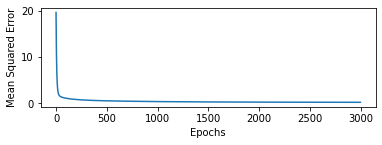

Testing
Testing MSE is  0.21429151729009435
Testing MAE is  0.37909749404066273


In [ ]:
GD3 = PolynomialRegression(3)
x_train_trans_3 = GD3.transform(train_X)
GD3.fit(x_train_trans_3, train_y, epochs = 3000, learning='GD', learning_rate=0.02)
x_test_trans_3 = GD3.transform(test_X)
GD3.evaluate(x_test_trans_3 , test_y)

In [ ]:
wGD3 = GD3.w

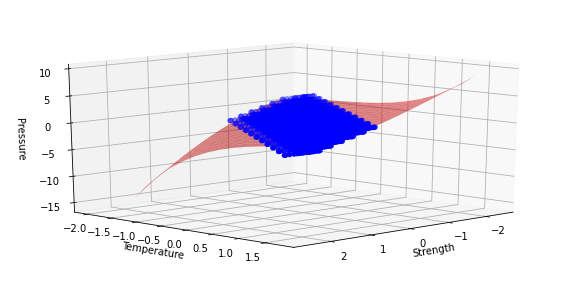

In [ ]:
# plot for 0 degree polynomial GD

plt.figure(figsize=(10, 5))
ax = plt.axes(projection='3d')

xx,yy = np.meshgrid(np.arange(-2, 2, 0.25), np.arange(-2, 2, 0.25))
Z=genCurve(wGD3,xx,yy,3)

ax.plot_surface(xx, yy, Z, alpha=0.5, color='r')
ax.scatter3D(X[:,0], X[:,1], y, c='b' )
ax.set_xlabel("Strength")
ax.set_ylabel("Temperature")
ax.set_zlabel("Pressure")
ax.view_init(15,45)

plt.show()

###### SGD

Training...


  0%|          | 0/5500 [00:00<?, ?epoch/s]

Epoch: 0  MSE Loss : 10.216180101766305
Epoch: 50  MSE Loss : 1.125005644012731
Epoch: 100  MSE Loss : 0.7625759971760221
Epoch: 150  MSE Loss : 0.8391528848509744
Epoch: 200  MSE Loss : 0.718721337400912
Epoch: 250  MSE Loss : 0.5389436414565353
Epoch: 300  MSE Loss : 0.8388367266359531
Epoch: 350  MSE Loss : 0.465322674923351
Epoch: 400  MSE Loss : 0.4337136393072812
Epoch: 450  MSE Loss : 0.4382014865041756
Epoch: 500  MSE Loss : 0.4171609819776876
Epoch: 550  MSE Loss : 0.557823930692843
Epoch: 600  MSE Loss : 0.3836288910430213
Epoch: 650  MSE Loss : 0.4101232163662953
Epoch: 700  MSE Loss : 0.36977192617610277
Epoch: 750  MSE Loss : 0.6060656957702313
Epoch: 800  MSE Loss : 0.6903140494308422
Epoch: 850  MSE Loss : 0.37554957129687466
Epoch: 900  MSE Loss : 0.35236102508256245
Epoch: 950  MSE Loss : 0.38300298411021266
Epoch: 1000  MSE Loss : 0.3956062687688056
Epoch: 1050  MSE Loss : 0.39336477199307673
Epoch: 1100  MSE Loss : 0.47585157521741
Epoch: 1150  MSE Loss : 0.365884306

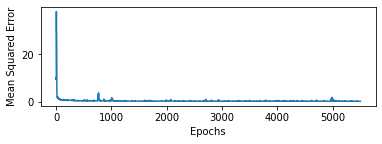

Testing
Testing MSE is  0.20600854784988648
Testing MAE is  0.3655799820074464


In [ ]:
SGD3 = PolynomialRegression(3)
x_train_trans_3 = SGD3.transform(train_X)
SGD3.fit(x_train_trans_3, train_y, epochs = 5500, learning='SGD', learning_rate=0.01)
x_test_trans_3 = SGD3.transform(test_X)
SGD3.evaluate(x_test_trans_3 , test_y)

In [ ]:
wSGD3 = SGD3.w

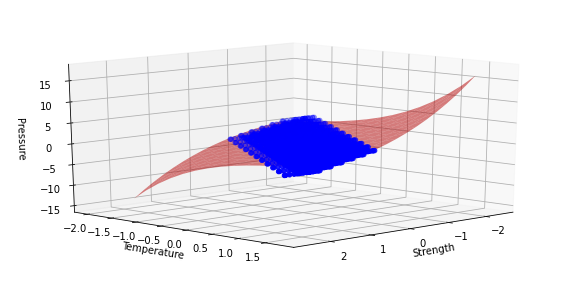

In [ ]:
# plot for 0 degree polynomial GD

plt.figure(figsize=(10, 5))
ax = plt.axes(projection='3d')

xx,yy = np.meshgrid(np.arange(-2, 2, 0.25), np.arange(-2, 2, 0.25))
Z=genCurve(wSGD3,xx,yy,3)

ax.plot_surface(xx, yy, Z, alpha=0.5, color='r')
ax.scatter3D(X[:,0], X[:,1], y, c='b' )
ax.set_xlabel("Strength")
ax.set_ylabel("Temperature")
ax.set_zlabel("Pressure")
ax.view_init(15,45)

plt.show()

### 4 Degree Polynomial

##### GD

Training...


  0%|          | 0/3500 [00:00<?, ?epoch/s]

Epoch: 0  Cost :  51640068.3816901  MSE Loss : 6.926764316413953
Epoch: 50  Cost :  1219511.8842416748  MSE Loss : 1.8093166586183012
Epoch: 100  Cost :  828869.5773382297  MSE Loss : 1.2351490776845306
Epoch: 150  Cost :  631722.9025542305  MSE Loss : 0.9424257037017587
Epoch: 200  Cost :  502048.14153997344  MSE Loss : 0.7494832801803859
Epoch: 250  Cost :  411922.9491585963  MSE Loss : 0.6153135860237042
Epoch: 300  Cost :  348048.0486000465  MSE Loss : 0.5201938962842585
Epoch: 350  Cost :  302135.41758694826  MSE Loss : 0.45180424038743533
Epoch: 400  Cost :  268676.740420465  MSE Loss : 0.4019514644782329
Epoch: 450  Cost :  243936.64966201043  MSE Loss : 0.3650781230357486
Epoch: 500  Cost :  225357.69524336985  MSE Loss : 0.3373786966155073
Epoch: 550  Cost :  211177.21664032023  MSE Loss : 0.31623000013353614
Epoch: 600  Cost :  200172.86006183602  MSE Loss : 0.2998127026436348
Epoch: 650  Cost :  191491.3306036393  MSE Loss : 0.28685659526479845
Epoch: 700  Cost :  184532.439

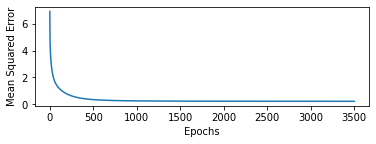

Testing
Testing MSE is  0.20673115615462304
Testing MAE is  0.3642120957167318


In [ ]:
GD4 = PolynomialRegression(4)
x_train_trans_4 = GD4.transform(train_X)
GD4.fit(x_train_trans_4, train_y, epochs = 3500, learning='GD', learning_rate=0.02)
x_test_trans_4 = GD4.transform(test_X)
GD4.evaluate(x_test_trans_4 , test_y)

In [ ]:
wGD4 = GD4.w

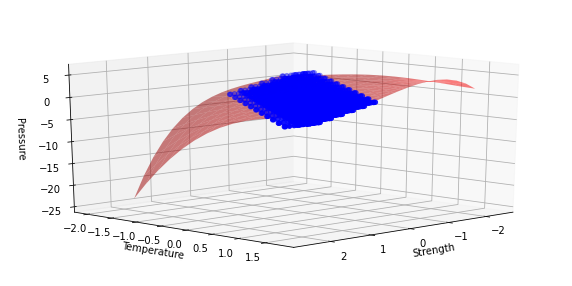

In [ ]:
# plot for 0 degree polynomial GD

plt.figure(figsize=(10, 5))
ax = plt.axes(projection='3d')

xx,yy = np.meshgrid(np.arange(-2, 2, 0.25), np.arange(-2, 2, 0.25))
Z=genCurve(wGD4,xx,yy,4)

ax.plot_surface(xx, yy, Z, alpha=0.5, color='r')
ax.scatter3D(X[:,0], X[:,1], y, c='b' )
ax.set_xlabel("Strength")
ax.set_ylabel("Temperature")
ax.set_zlabel("Pressure")
ax.view_init(15,45)

plt.show()

##### SGD

Training...


  0%|          | 0/5000 [00:00<?, ?epoch/s]

Epoch: 0  MSE Loss : 329.6511998196053
Epoch: 50  MSE Loss : 27.239314513417618
Epoch: 100  MSE Loss : 10.659045279571604
Epoch: 150  MSE Loss : 1.7073484991571526
Epoch: 200  MSE Loss : 8.569205519201127
Epoch: 250  MSE Loss : 1.5432233625634773
Epoch: 300  MSE Loss : 2.252633886868228
Epoch: 350  MSE Loss : 1.4148579693305077
Epoch: 400  MSE Loss : 1.2136648081490145
Epoch: 450  MSE Loss : 2.698762210715308
Epoch: 500  MSE Loss : 30.527143928916256
Epoch: 550  MSE Loss : 10.64752971349345
Epoch: 600  MSE Loss : 2.4833262314365383
Epoch: 650  MSE Loss : 1.1876637470374722
Epoch: 700  MSE Loss : 0.9116670816800962
Epoch: 750  MSE Loss : 0.936461669546968
Epoch: 800  MSE Loss : 0.9638722155142555
Epoch: 850  MSE Loss : 0.8605759800838172
Epoch: 900  MSE Loss : 1.2088046725574797
Epoch: 950  MSE Loss : 0.6998470125688748
Epoch: 1000  MSE Loss : 1.0489234742009816
Epoch: 1050  MSE Loss : 6.559470959506789
Epoch: 1100  MSE Loss : 0.8479571701380918
Epoch: 1150  MSE Loss : 0.656989728138988

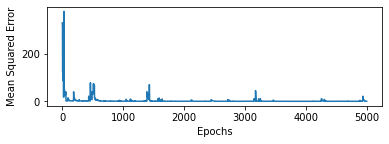

Testing
Testing MSE is  0.26236606577615834
Testing MAE is  0.416484511963791


In [ ]:
SGD4 = PolynomialRegression(4)
x_train_trans_4 = SGD4.transform(train_X)
SGD4.fit(x_train_trans_4, train_y, epochs = 5000, learning='SGD', learning_rate=0.0029)
x_test_trans_4 = SGD4.transform(test_X)
SGD4.evaluate(x_test_trans_4 , test_y)

In [ ]:
wSGD4 = SGD4.w

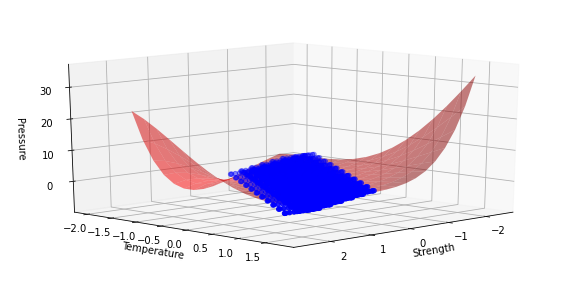

In [ ]:
# plot for 0 degree polynomial GD

plt.figure(figsize=(10, 5))
ax = plt.axes(projection='3d')

xx,yy = np.meshgrid(np.arange(-2, 2, 0.25), np.arange(-2, 2, 0.25))
Z=genCurve(wSGD4,xx,yy,4)

ax.plot_surface(xx, yy, Z, alpha=0.5, color='r')
ax.scatter3D(X[:,0], X[:,1], y, c='b' )
ax.set_xlabel("Strength")
ax.set_ylabel("Temperature")
ax.set_zlabel("Pressure")
ax.view_init(15,45)

plt.show()

### 5 Degree Polynomial

##### GD

Training...


  0%|          | 0/5000 [00:00<?, ?epoch/s]

Epoch: 0  MSE Loss : 141.93575658570512
Epoch: 50  MSE Loss : 1.6425018604133907
Epoch: 100  MSE Loss : 1.3704022009077261
Epoch: 150  MSE Loss : 1.202524263575567
Epoch: 200  MSE Loss : 1.0756703234385623
Epoch: 250  MSE Loss : 0.9742086266646585
Epoch: 300  MSE Loss : 0.8904019786692947
Epoch: 350  MSE Loss : 0.8197163854302201
Epoch: 400  MSE Loss : 0.7592409279692153
Epoch: 450  MSE Loss : 0.706967230316212
Epoch: 500  MSE Loss : 0.6614294402288522
Epoch: 550  MSE Loss : 0.6215113336453515
Epoch: 600  MSE Loss : 0.5863358871585026
Epoch: 650  MSE Loss : 0.5551980117794476
Epoch: 700  MSE Loss : 0.5275211856102482
Epoch: 750  MSE Loss : 0.5028280416645903
Epoch: 800  MSE Loss : 0.48071952120395467
Epoch: 850  MSE Loss : 0.460859536558096
Epoch: 900  MSE Loss : 0.442963335901959
Epoch: 950  MSE Loss : 0.4267884568666385
Epoch: 1000  MSE Loss : 0.4121275560425262
Epoch: 1050  MSE Loss : 0.3988026399494977
Epoch: 1100  MSE Loss : 0.38666037000404296
Epoch: 1150  MSE Loss : 0.3755682076

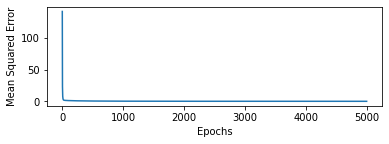

Testing
Testing MSE is  0.2115524495068966
Testing MAE is  0.3695551212291927


In [ ]:
GD5 = PolynomialRegression(5)
x_train_trans_5 = GD5.transform(train_X)
GD5.fit(x_train_trans_5, train_y, epochs = 5000, learning='GD', learning_rate=0.007)
x_test_trans_5 = GD5.transform(test_X)
GD5.evaluate(x_test_trans_5 , test_y)

In [ ]:
wGD5 = GD5.w

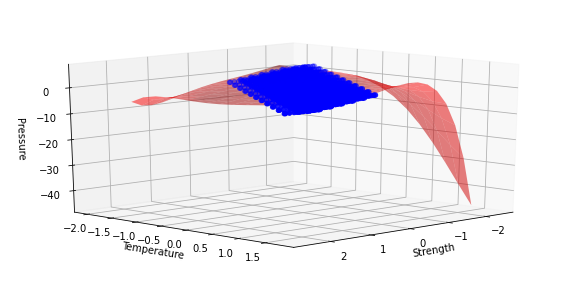

In [ ]:
# plot for 0 degree polynomial GD

plt.figure(figsize=(10, 5))
ax = plt.axes(projection='3d')

xx,yy = np.meshgrid(np.arange(-2, 2, 0.25), np.arange(-2, 2, 0.25))
Z=genCurve(wGD5,xx,yy,5)

ax.plot_surface(xx, yy, Z, alpha=0.5, color='r')
ax.scatter3D(X[:,0], X[:,1], y, c='b' )
ax.set_xlabel("Strength")
ax.set_ylabel("Temperature")
ax.set_zlabel("Pressure")
ax.view_init(15,45)

plt.show()

##### SGD

Training...


  0%|          | 0/25000 [00:00<?, ?epoch/s]

Epoch: 0  MSE Loss : 64.11212954094552
Epoch: 50  MSE Loss : 83.2087921821632
Epoch: 100  MSE Loss : 25.01616957451464
Epoch: 150  MSE Loss : 22.599607118651473
Epoch: 200  MSE Loss : 10.731630694827563
Epoch: 250  MSE Loss : 11.663364573018372
Epoch: 300  MSE Loss : 9.200217641826452
Epoch: 350  MSE Loss : 80.91586999950971
Epoch: 400  MSE Loss : 81.37577476052013
Epoch: 450  MSE Loss : 48.6127798125491
Epoch: 500  MSE Loss : 7.967076240002335
Epoch: 550  MSE Loss : 7.576624131529407
Epoch: 600  MSE Loss : 9.79049100201614
Epoch: 650  MSE Loss : 5.7443855376986175
Epoch: 700  MSE Loss : 6.63494729859213
Epoch: 750  MSE Loss : 6.596233510538436
Epoch: 800  MSE Loss : 7.018357178148479
Epoch: 850  MSE Loss : 18.224404802347344
Epoch: 900  MSE Loss : 8.004565355416204
Epoch: 950  MSE Loss : 7.424900098707109
Epoch: 1000  MSE Loss : 5.944123353088866
Epoch: 1050  MSE Loss : 4.777554439338281
Epoch: 1100  MSE Loss : 4.441824548209239
Epoch: 1150  MSE Loss : 4.111623018168317
Epoch: 1200  M

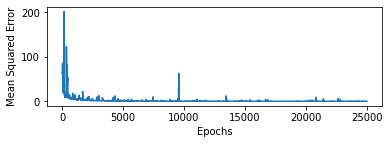

Testing
Testing MSE is  0.3642299990683186
Testing MAE is  0.46535462741198885


In [ ]:
SGD5 = PolynomialRegression(5)
x_train_trans_5 = SGD5.transform(train_X)
SGD5.fit(x_train_trans_5, train_y, epochs = 25000, learning='SGD', learning_rate=0.00035)
x_test_trans_5 = SGD5.transform(test_X)
SGD5.evaluate(x_test_trans_5 , test_y)

In [ ]:
wSGD5 = SGD5.w

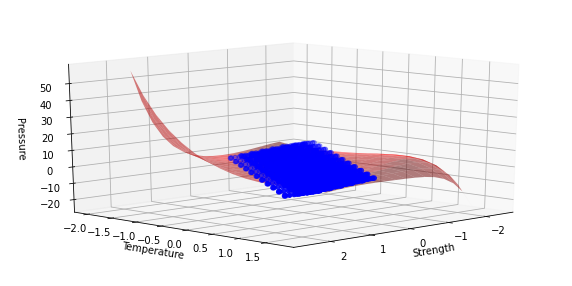

In [ ]:
# plot for 0 degree polynomial GD

plt.figure(figsize=(10, 5))
ax = plt.axes(projection='3d')

xx,yy = np.meshgrid(np.arange(-2, 2, 0.25), np.arange(-2, 2, 0.25))
Z=genCurve(wSGD5,xx,yy,5)

ax.plot_surface(xx, yy, Z, alpha=0.5, color='r')
ax.scatter3D(X[:,0], X[:,1], y, c='b' )
ax.set_xlabel("Strength")
ax.set_ylabel("Temperature")
ax.set_zlabel("Pressure")
ax.view_init(15,45)

plt.show()

### 6 Degree Polynomial

##### GD

Training...


  0%|          | 0/10000 [00:00<?, ?epoch/s]

Epoch: 0  MSE Loss : 236.17637365337504
Epoch: 50  MSE Loss : 6.225632954162549
Epoch: 100  MSE Loss : 4.877365929598291
Epoch: 150  MSE Loss : 4.134380260338977
Epoch: 200  MSE Loss : 3.617679500484889
Epoch: 250  MSE Loss : 3.220025462383887
Epoch: 300  MSE Loss : 2.9008323577787913
Epoch: 350  MSE Loss : 2.6393418358675937
Epoch: 400  MSE Loss : 2.4222573941540495
Epoch: 450  MSE Loss : 2.240040216265988
Epoch: 500  MSE Loss : 2.085516949662179
Epoch: 550  MSE Loss : 1.9531837227316036
Epoch: 600  MSE Loss : 1.8387728677211208
Epoch: 650  MSE Loss : 1.7389507904376909
Epoch: 700  MSE Loss : 1.6510969288300936
Epoch: 750  MSE Loss : 1.5731387310089375
Epoch: 800  MSE Loss : 1.503427208297197
Epoch: 850  MSE Loss : 1.440642471811872
Epoch: 900  MSE Loss : 1.3837216470099956
Epoch: 950  MSE Loss : 1.331803596304231
Epoch: 1000  MSE Loss : 1.2841863306077164
Epoch: 1050  MSE Loss : 1.2402940445947834
Epoch: 1100  MSE Loss : 1.1996514835074767
Epoch: 1150  MSE Loss : 1.1618639198207095
E

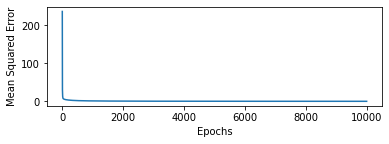

Testing
Testing MSE is  0.24724983822671132
Testing MAE is  0.401297765244595


In [ ]:
GD6 = PolynomialRegression(6) 
x_train_trans_6 = GD6.transform(train_X)
GD6.fit(x_train_trans_6, train_y, epochs = 10000, learning='GD', learning_rate=0.00238)
x_test_trans_6 = GD6.transform(test_X)
GD6.evaluate(x_test_trans_6 , test_y)

In [ ]:
wGD6 = GD6.w

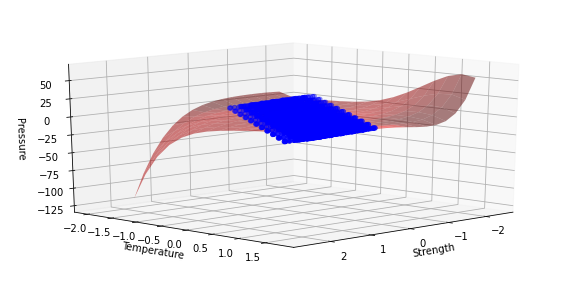

In [ ]:
# plot for 0 degree polynomial GD

plt.figure(figsize=(10, 5))
ax = plt.axes(projection='3d')

xx,yy = np.meshgrid(np.arange(-2, 2, 0.25), np.arange(-2, 2, 0.25))
Z=genCurve(wGD6,xx,yy,6)

ax.plot_surface(xx, yy, Z, alpha=0.5, color='r')
ax.scatter3D(X[:,0], X[:,1], y, c='b' )
ax.set_xlabel("Strength")
ax.set_ylabel("Temperature")
ax.set_zlabel("Pressure")
ax.view_init(15,45)

plt.show()

##### SGD

Training...


  0%|          | 0/90000 [00:00<?, ?epoch/s]

Epoch: 0  MSE Loss : 2181.138407801454
Epoch: 50  MSE Loss : 732.4046176707604
Epoch: 100  MSE Loss : 803.9645073439341
Epoch: 150  MSE Loss : 300.8913287277685
Epoch: 200  MSE Loss : 225.618949051276
Epoch: 250  MSE Loss : 326.9435251356045
Epoch: 300  MSE Loss : 103.37949294104584
Epoch: 350  MSE Loss : 72.8088397715503
Epoch: 400  MSE Loss : 91.4883565009566
Epoch: 450  MSE Loss : 73.6363140150447
Epoch: 500  MSE Loss : 40.57902654148975
Epoch: 550  MSE Loss : 50.443114103068474
Epoch: 600  MSE Loss : 37.660908338185685
Epoch: 650  MSE Loss : 64.07912074799881
Epoch: 700  MSE Loss : 54.97012455422461
Epoch: 750  MSE Loss : 94.48775682522131
Epoch: 800  MSE Loss : 45.53431828726826
Epoch: 850  MSE Loss : 25.270124997807557
Epoch: 900  MSE Loss : 22.656312070041988
Epoch: 950  MSE Loss : 18.781810856908045
Epoch: 1000  MSE Loss : 17.68858928582372
Epoch: 1050  MSE Loss : 18.68043142354448
Epoch: 1100  MSE Loss : 20.189969260327725
Epoch: 1150  MSE Loss : 13.714814584437002
Epoch: 1200

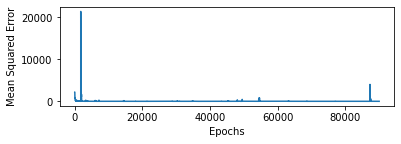

Testing
Testing MSE is  0.37793939133278853
Testing MAE is  0.4810974866024516


In [ ]:
SGD6 = PolynomialRegression(6)
x_train_trans_6 = SGD6.transform(train_X)
SGD6.fit(x_train_trans_6, train_y, epochs = 90000, learning='SGD', learning_rate=0.000074)
x_test_trans_6 = SGD6.transform(test_X)
SGD6.evaluate(x_test_trans_6 , test_y)

In [ ]:
wSGD6 = SGD6.w

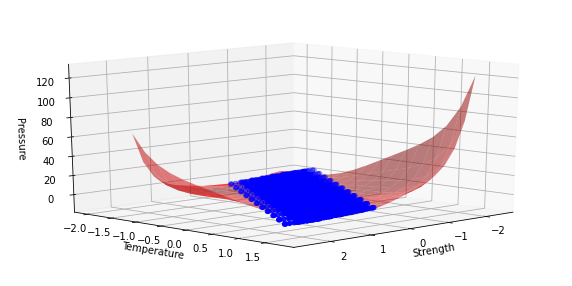

In [ ]:
# plot for 0 degree polynomial GD

plt.figure(figsize=(10, 5))
ax = plt.axes(projection='3d')

xx,yy = np.meshgrid(np.arange(-2, 2, 0.25), np.arange(-2, 2, 0.25))
Z=genCurve(wSGD6,xx,yy,6)

ax.plot_surface(xx, yy, Z, alpha=0.5, color='r')
ax.scatter3D(X[:,0], X[:,1], y, c='b' )
ax.set_xlabel("Strength")
ax.set_ylabel("Temperature")
ax.set_zlabel("Pressure")
ax.view_init(15,45)

plt.show()

### 7 Degree Polynomial

##### GD

Training...


  0%|          | 0/60000 [00:00<?, ?epoch/s]

Epoch: 0  MSE Loss : 2928.5482261579623
Epoch: 50  MSE Loss : 18.86154897846863
Epoch: 100  MSE Loss : 14.955663936786522
Epoch: 150  MSE Loss : 12.121875997987305
Epoch: 200  MSE Loss : 9.982063750389573
Epoch: 250  MSE Loss : 8.33962687592027
Epoch: 300  MSE Loss : 7.06752910277205
Epoch: 350  MSE Loss : 6.075941690879635
Epoch: 400  MSE Loss : 5.298566931518717
Epoch: 450  MSE Loss : 4.6855150169924595
Epoch: 500  MSE Loss : 4.198910041235139
Epoch: 550  MSE Loss : 3.8098723114721595
Epoch: 600  MSE Loss : 3.4963269566884
Epoch: 650  MSE Loss : 3.2413706546429917
Epoch: 700  MSE Loss : 3.0320400206564346
Epoch: 750  MSE Loss : 2.858377880894405
Epoch: 800  MSE Loss : 2.7127234842664305
Epoch: 850  MSE Loss : 2.5891721090811926
Epoch: 900  MSE Loss : 2.4831631942553254
Epoch: 950  MSE Loss : 2.391166150554863
Epoch: 1000  MSE Loss : 2.310440492972746
Epoch: 1050  MSE Loss : 2.238852570851636
Epoch: 1100  MSE Loss : 2.1747354318601113
Epoch: 1150  MSE Loss : 2.116781582250831
Epoch: 1

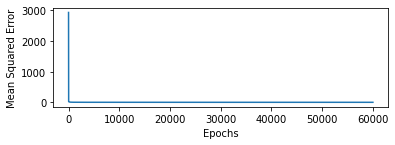

Testing
Testing MSE is  0.2534382066303367
Testing MAE is  0.4078569576166002


In [ ]:
GD7 = PolynomialRegression(7) 
x_train_trans_7 = GD7.transform(train_X)
GD7.fit(x_train_trans_7, train_y, epochs = 60000, learning='GD', learning_rate=0.0005)
x_test_trans_7 = GD7.transform(test_X)
GD7.evaluate(x_test_trans_7 , test_y)

In [ ]:
wGD7 = GD7.w

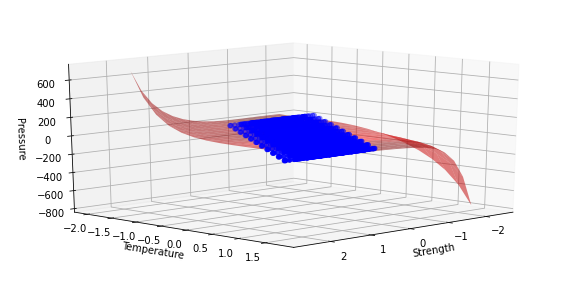

In [ ]:
# plot for 0 degree polynomial GD

plt.figure(figsize=(10, 5))
ax = plt.axes(projection='3d')

xx,yy = np.meshgrid(np.arange(-2, 2, 0.25), np.arange(-2, 2, 0.25))
Z=genCurve(wGD7,xx,yy,7)

ax.plot_surface(xx, yy, Z, alpha=0.5, color='r')
ax.scatter3D(X[:,0], X[:,1], y, c='b' )
ax.set_xlabel("Strength")
ax.set_ylabel("Temperature")
ax.set_zlabel("Pressure")
ax.view_init(15,45)

plt.show()

##### SGD

Training...


  0%|          | 0/200000 [00:00<?, ?epoch/s]

Epoch: 0  MSE Loss : 1758.1179074385277
Epoch: 50  MSE Loss : 1905.85588647983
Epoch: 100  MSE Loss : 367.38510493100705
Epoch: 150  MSE Loss : 266.37093457367666
Epoch: 200  MSE Loss : 296.80828865290016
Epoch: 250  MSE Loss : 172.70172972082804
Epoch: 300  MSE Loss : 159.63093076828198
Epoch: 350  MSE Loss : 135.03101548807695
Epoch: 400  MSE Loss : 119.99585006754585
Epoch: 450  MSE Loss : 94.2432945632253
Epoch: 500  MSE Loss : 87.8245726304566
Epoch: 550  MSE Loss : 83.18278518911343
Epoch: 600  MSE Loss : 86.59196859484133
Epoch: 650  MSE Loss : 77.56701702553221
Epoch: 700  MSE Loss : 57.313854410795514
Epoch: 750  MSE Loss : 56.40619220465619
Epoch: 800  MSE Loss : 54.08081864385417
Epoch: 850  MSE Loss : 234.1548951938343
Epoch: 900  MSE Loss : 553.7879717590469
Epoch: 950  MSE Loss : 63.44514572625191
Epoch: 1000  MSE Loss : 58.481490286855994
Epoch: 1050  MSE Loss : 234.12034960508421
Epoch: 1100  MSE Loss : 1155.0632677402944
Epoch: 1150  MSE Loss : 53.206678821041464
Epoch

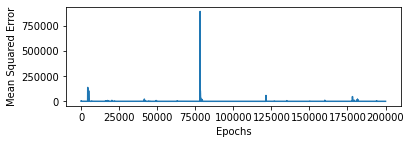

Testing
Testing MSE is  0.6372989055456555
Testing MAE is  0.6301116799291689


In [ ]:
SGD7 = PolynomialRegression(7)
x_train_trans_7 = SGD7.transform(train_X)
SGD7.fit(x_train_trans_7, train_y, epochs = 200000, learning='SGD', learning_rate=0.0000112)
x_test_trans_7 = SGD7.transform(test_X)
SGD7.evaluate(x_test_trans_7 , test_y)

In [ ]:
wSGD7 = SGD7.w

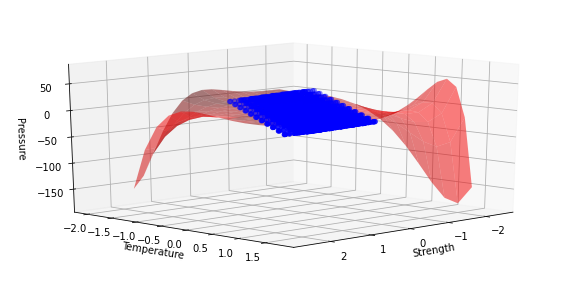

In [ ]:
# plot for 0 degree polynomial GD

plt.figure(figsize=(10, 5))
ax = plt.axes(projection='3d')

xx,yy = np.meshgrid(np.arange(-2, 2, 0.25), np.arange(-2, 2, 0.25))
Z=genCurve(wSGD7,xx,yy,7)

ax.plot_surface(xx, yy, Z, alpha=0.5, color='r')
ax.scatter3D(X[:,0], X[:,1], y, c='b' )
ax.set_xlabel("Strength")
ax.set_ylabel("Temperature")
ax.set_zlabel("Pressure")
ax.view_init(15,45)

plt.show()

### 8 Degree Polynomial

##### GD

Training...


  0%|          | 0/150000 [00:00<?, ?epoch/s]

Epoch: 0  MSE Loss : 53165.718407837216
Epoch: 50  MSE Loss : 42306.10155063306
Epoch: 100  MSE Loss : 33956.66307055381
Epoch: 150  MSE Loss : 27277.63111060257
Epoch: 200  MSE Loss : 21918.05074946625
Epoch: 250  MSE Loss : 17613.533988777646
Epoch: 300  MSE Loss : 14155.34394818329
Epoch: 350  MSE Loss : 11376.730746272817
Epoch: 400  MSE Loss : 9144.01390684392
Epoch: 450  MSE Loss : 7349.884958331803
Epoch: 500  MSE Loss : 5908.15774050441
Epoch: 550  MSE Loss : 4749.593596149855
Epoch: 600  MSE Loss : 3818.5623842275745
Epoch: 650  MSE Loss : 3070.3653119707433
Epoch: 700  MSE Loss : 2469.085944690824
Epoch: 750  MSE Loss : 1985.8642600805479
Epoch: 800  MSE Loss : 1597.5101139853361
Epoch: 850  MSE Loss : 1285.3892364705348
Epoch: 900  MSE Loss : 1034.5281392582342
Epoch: 950  MSE Loss : 832.8948966874245
Epoch: 1000  MSE Loss : 670.8212357430509
Epoch: 1050  MSE Loss : 540.538168319675
Epoch: 1100  MSE Loss : 435.80285677894744
Epoch: 1150  MSE Loss : 351.5987878424713
Epoch: 1

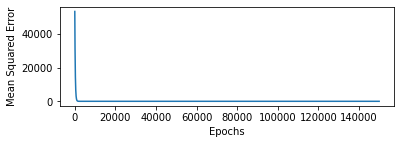

Testing
Testing MSE is  0.34878270855750704
Testing MAE is  0.4830438337653215


In [ ]:
GD8 = PolynomialRegression(8) 
x_train_trans_8 = GD8.transform(train_X)
GD8.fit(x_train_trans_8, train_y, epochs = 150000, learning='GD', learning_rate=0.00011)
x_test_trans_8 = GD8.transform(test_X)
GD8.evaluate(x_test_trans_8 , test_y)

In [ ]:
wGD8 = GD8.w

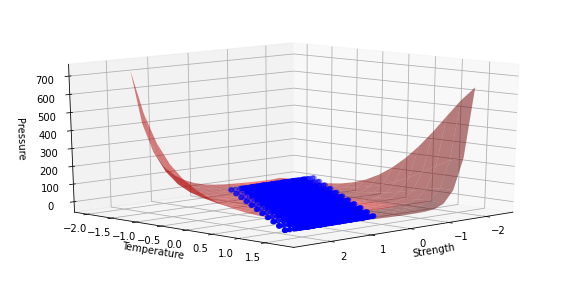

In [ ]:
# plot for 0 degree polynomial GD

plt.figure(figsize=(10, 5))
ax = plt.axes(projection='3d')

xx,yy = np.meshgrid(np.arange(-2, 2, 0.25), np.arange(-2, 2, 0.25))
Z=genCurve(wGD8,xx,yy,8)

ax.plot_surface(xx, yy, Z, alpha=0.5, color='r')
ax.scatter3D(X[:,0], X[:,1], y, c='b' )
ax.set_xlabel("Strength")
ax.set_ylabel("Temperature")
ax.set_zlabel("Pressure")
ax.view_init(15,45)

plt.show()

##### SGD

Training...


  0%|          | 0/700000 [00:00<?, ?epoch/s]

Streaming output truncated to the last 5000 lines.
Epoch: 450000  MSE Loss : 1.3784782421080217
Epoch: 450050  MSE Loss : 1.7909036032111267
Epoch: 450100  MSE Loss : 1.445471583434008
Epoch: 450150  MSE Loss : 1.3975416994913399
Epoch: 450200  MSE Loss : 1.858794369386535
Epoch: 450250  MSE Loss : 1.350655306135271
Epoch: 450300  MSE Loss : 41.13264889026029
Epoch: 450350  MSE Loss : 12.301453744370578
Epoch: 450400  MSE Loss : 3.089032397763404
Epoch: 450450  MSE Loss : 2.458798317628353
Epoch: 450500  MSE Loss : 1.345124236724931
Epoch: 450550  MSE Loss : 1.3857462666832214
Epoch: 450600  MSE Loss : 1.3863681789074271
Epoch: 450650  MSE Loss : 1.3265235771200714
Epoch: 450700  MSE Loss : 1.230473025957945
Epoch: 450750  MSE Loss : 1.243553223231508
Epoch: 450800  MSE Loss : 1.42056906173172
Epoch: 450850  MSE Loss : 15.426578396569653
Epoch: 450900  MSE Loss : 143.74016246426407
Epoch: 450950  MSE Loss : 84.2055676123614
Epoch: 451000  MSE Loss : 14.306605001769938
Epoch: 451050  MS

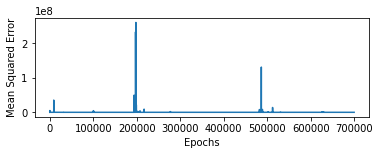

Testing
Testing MSE is  0.8251040060808154
Testing MAE is  0.7062730457725416


In [ ]:
SGD8 = PolynomialRegression(8)
x_train_trans_8 = SGD8.transform(train_X)
SGD8.fit(x_train_trans_8, train_y, epochs = 700000, learning='SGD', learning_rate=0.00000175)
x_test_trans_8 = SGD8.transform(test_X)
SGD8.evaluate(x_test_trans_8 , test_y)

In [ ]:
wSGD8 = SGD8.w

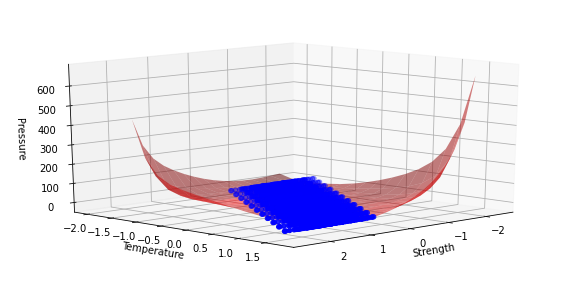

In [ ]:
# plot for 0 degree polynomial GD

plt.figure(figsize=(10, 5))
ax = plt.axes(projection='3d')

xx,yy = np.meshgrid(np.arange(-2, 2, 0.25), np.arange(-2, 2, 0.25))
Z=genCurve(wSGD8,xx,yy,8)

ax.plot_surface(xx, yy, Z, alpha=0.5, color='r')
ax.scatter3D(X[:,0], X[:,1], y, c='b' )
ax.set_xlabel("Strength")
ax.set_ylabel("Temperature")
ax.set_zlabel("Pressure")
ax.view_init(15,45)

plt.show()

### 9 Degree Polynomial

##### GD

Training...


  0%|          | 0/400000 [00:00<?, ?epoch/s]

Streaming output truncated to the last 5000 lines.
Epoch: 150000  MSE Loss : 0.7768274717238776
Epoch: 150050  MSE Loss : 0.776556487471674
Epoch: 150100  MSE Loss : 0.7762857332565622
Epoch: 150150  MSE Loss : 0.7760152088502977
Epoch: 150200  MSE Loss : 0.7757449140248919
Epoch: 150250  MSE Loss : 0.7754748485525984
Epoch: 150300  MSE Loss : 0.7752050122059284
Epoch: 150350  MSE Loss : 0.7749354047576525
Epoch: 150400  MSE Loss : 0.774666025980773
Epoch: 150450  MSE Loss : 0.7743968756485684
Epoch: 150500  MSE Loss : 0.7741279535345393
Epoch: 150550  MSE Loss : 0.7738592594124555
Epoch: 150600  MSE Loss : 0.7735907930563323
Epoch: 150650  MSE Loss : 0.7733225542404331
Epoch: 150700  MSE Loss : 0.7730545427392628
Epoch: 150750  MSE Loss : 0.7727867583275879
Epoch: 150800  MSE Loss : 0.7725192007804174
Epoch: 150850  MSE Loss : 0.77225186987301
Epoch: 150900  MSE Loss : 0.7719847653808684
Epoch: 150950  MSE Loss : 0.7717178870797429
Epoch: 151000  MSE Loss : 0.771451234745639
Epoch: 15

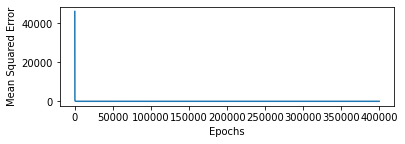

Testing
Testing MSE is  0.42587303221245354
Testing MAE is  0.5321588120662094


In [ ]:
GD9 = PolynomialRegression(9) 
x_train_trans_9 = GD9.transform(train_X)
GD9.fit(x_train_trans_9, train_y, epochs = 400000, learning='GD', learning_rate=0.000021)
x_test_trans_9 = GD9.transform(test_X)
GD9.evaluate(x_test_trans_9 , test_y)

In [ ]:
wGD9 = GD9.w

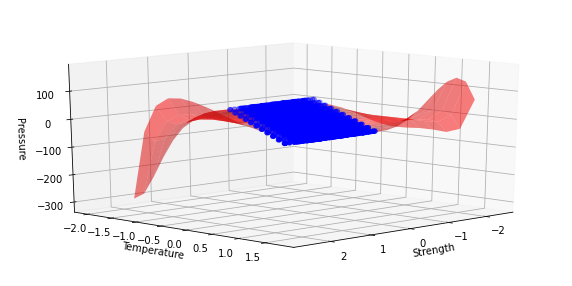

In [ ]:
# plot for 0 degree polynomial GD

plt.figure(figsize=(10, 5))
ax = plt.axes(projection='3d')

xx,yy = np.meshgrid(np.arange(-2, 2, 0.25), np.arange(-2, 2, 0.25))
Z=genCurve(wGD9,xx,yy,9)

ax.plot_surface(xx, yy, Z, alpha=0.5, color='r')
ax.scatter3D(X[:,0], X[:,1], y, c='b' )
ax.set_xlabel("Strength")
ax.set_ylabel("Temperature")
ax.set_zlabel("Pressure")
ax.view_init(15,45)

plt.show()

##### SGD

Training...


  0%|          | 0/3000000 [00:00<?, ?epoch/s]

Streaming output truncated to the last 5000 lines.
Epoch: 2750000  MSE Loss : 18.32172624766939
Epoch: 2750050  MSE Loss : 18.960714642702886
Epoch: 2750100  MSE Loss : 13.693328585491532
Epoch: 2750150  MSE Loss : 12.394979652061735
Epoch: 2750200  MSE Loss : 11.21051104547442
Epoch: 2750250  MSE Loss : 6.538887335196318
Epoch: 2750300  MSE Loss : 24.542167155668434
Epoch: 2750350  MSE Loss : 300.49983461369976
Epoch: 2750400  MSE Loss : 188.47635666252043
Epoch: 2750450  MSE Loss : 13.75842557054342
Epoch: 2750500  MSE Loss : 14.78639274956523
Epoch: 2750550  MSE Loss : 12.214662977843087
Epoch: 2750600  MSE Loss : 13.001675972815452
Epoch: 2750650  MSE Loss : 12.925563104128976
Epoch: 2750700  MSE Loss : 11.190190279307938
Epoch: 2750750  MSE Loss : 9.395743756109391
Epoch: 2750800  MSE Loss : 7.197624279456505
Epoch: 2750850  MSE Loss : 7.299336722024907
Epoch: 2750900  MSE Loss : 8.169414668395522
Epoch: 2750950  MSE Loss : 5.87510487150957
Epoch: 2751000  MSE Loss : 5.06204229182

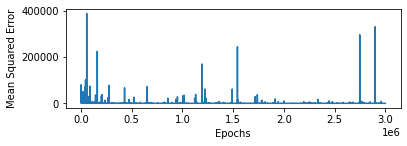

Testing
Testing MSE is  4.030683949925308
Testing MAE is  1.285866958441079


In [ ]:
SGD9 = PolynomialRegression(9)
x_train_trans_9 = SGD9.transform(train_X)
SGD9.fit(x_train_trans_9, train_y, epochs = 3000000, learning='SGD', learning_rate=0.000000198)
x_test_trans_9 = SGD9.transform(test_X)
SGD9.evaluate(x_test_trans_9 , test_y)

In [ ]:
wSGD9 = SGD9.w

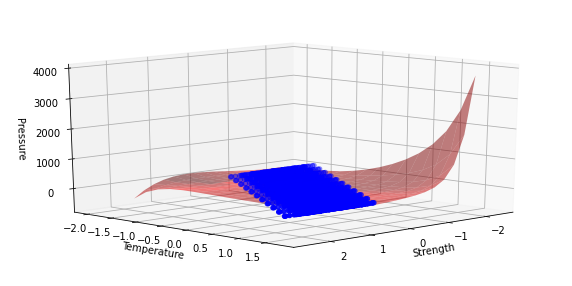

In [ ]:


plt.figure(figsize=(10, 5))
ax = plt.axes(projection='3d')

xx,yy = np.meshgrid(np.arange(-2, 2, 0.25), np.arange(-2, 2, 0.25))
Z=genCurve(wSGD9,xx,yy,9)

ax.plot_surface(xx, yy, Z, alpha=0.5, color='r')
ax.scatter3D(X[:,0], X[:,1], y, c='b' )
ax.set_xlabel("Strength")
ax.set_ylabel("Temperature")
ax.set_zlabel("Pressure")
ax.view_init(15,45)

plt.show()